*   Nama : Josua Williams Hasiholan Tampubolon
*   Email : josuawilliams17@gmail.com






In [78]:
!pip install split-folders

In [214]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy as sp
import itertools
import splitfolders
import zipfile,os
import cv2
import tensorflow as tf
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D
from tensorflow.keras.optimizers import Adam, RMSprop

In [216]:
local_zip = '/Clasification_hand_pic/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/Clasification_hand_pic/tmp')
zip_ref.close()

splitfolders.ratio('/Clasification_hand_pic/tmp/rockpaperscissors/rps-cv-images', output="/Clasification_hand_pic/tmp/rockpaperscissors/", seed=1337, ratio=(.6, .4))

data_dir = '/Clasification_hand_pic/tmp/rockpaperscissors/'
training_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'val')


print('Jumlah gambar di kelas Paper (Training):', len(os.listdir(os.path.join(training_dir, 'paper'))))
print('Jumlah gambar di kelas Rock (Training):', len(os.listdir(os.path.join(training_dir, 'rock'))))
print('Jumlah gambar di kelas Scissors (Training):', len(os.listdir(os.path.join(training_dir, 'scissors'))))

print('Jumlah gambar di kelas Paper (Validation):', len(os.listdir(os.path.join(validation_dir, 'paper'))))
print('Jumlah gambar di kelas Rock (Validation):', len(os.listdir(os.path.join(validation_dir, 'rock'))))
print('Jumlah gambar di kelas Scissors (Validation):', len(os.listdir(os.path.join(validation_dir, 'scissors'))))

Copying files: 2188 files [00:01, 1836.57 files/s]

Jumlah gambar di kelas Paper (Training): 427
Jumlah gambar di kelas Rock (Training): 435
Jumlah gambar di kelas Scissors (Training): 450
Jumlah gambar di kelas Paper (Validation): 285
Jumlah gambar di kelas Rock (Validation): 291
Jumlah gambar di kelas Scissors (Validation): 300


In [209]:
training_paper = os.path.join(training_dir, 'paper')
training_rock = os.path.join(training_dir, 'rock')
training_scissors = os.path.join(training_dir, 'scissors')

validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [210]:
paper_imgs = os.listdir(training_paper)
rock_imgs = os.listdir(training_rock)
scissors_imgs = os.listdir(training_scissors)

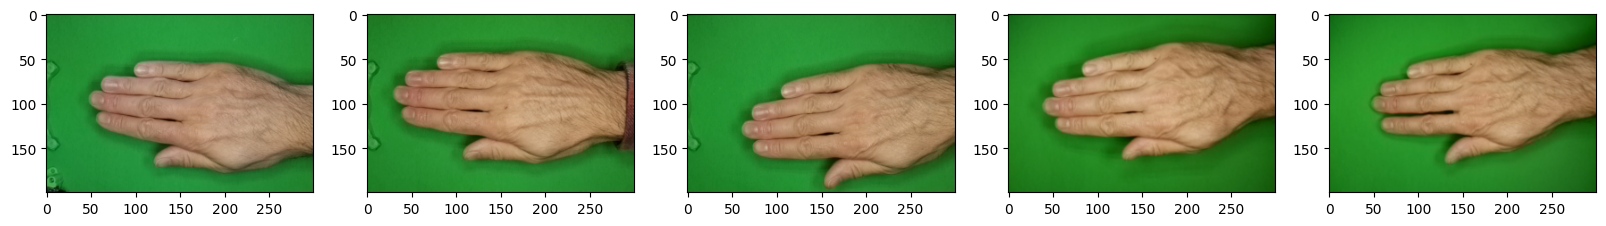

In [211]:
plt.figure(figsize=(20, 5))
for i, img_path in enumerate(paper_imgs[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(training_paper, img_path))
    plt.imshow(img)
plt.show()

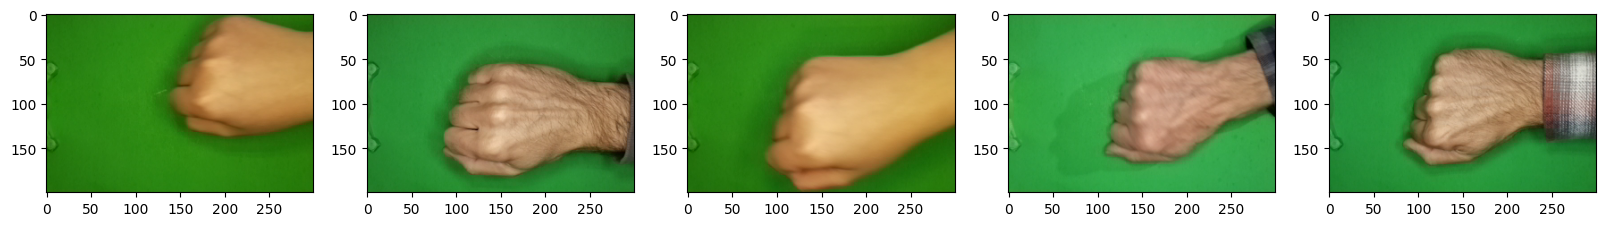

In [212]:
plt.figure(figsize=(20, 5))
for i, img_path in enumerate(rock_imgs[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(training_rock, img_path))
    plt.imshow(img)
plt.show()

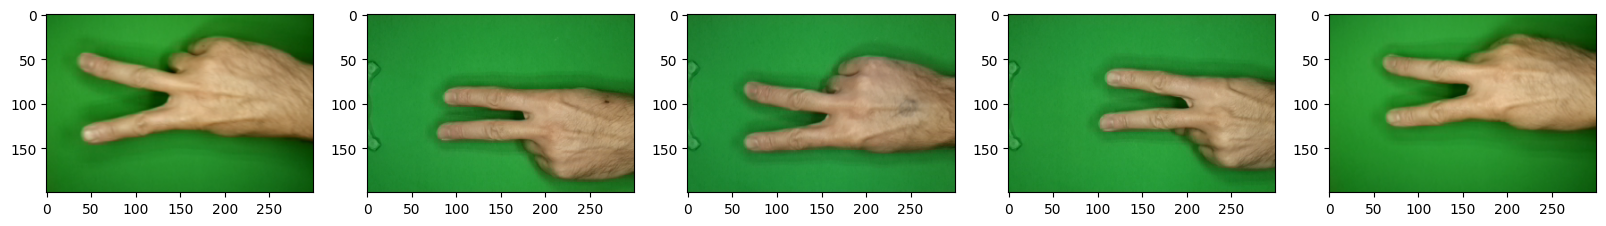

In [213]:
plt.figure(figsize=(20, 5))
for i, img_path in enumerate(scissors_imgs[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(training_scissors, img_path))
    plt.imshow(img)
plt.show()

In [205]:
train_datagen = ImageDataGenerator(rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [207]:
train_generator = train_datagen.flow_from_directory(
        training_dir,
        target_size=(100, 100),
        batch_size=40,
        class_mode='categorical'
        )

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=40,
        class_mode='categorical',
        )

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [184]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [185]:
validation_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [190]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 8, 8, 512)           │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,879,939 (18.62 MB)

 Trainable params: 4,879,939 (18.62 MB)

 Non-trainable params: 0 (0.00 B)

In [191]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [192]:
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/20
25/25 - 37s - 1s/step - accuracy: 0.5252 - loss: 0.9478 - val_accuracy: 0.7900 - val_loss: 0.6325
Epoch 2/20
25/25 - 9s - 355ms/step - accuracy: 0.8406 - loss: 0.4501 - val_accuracy: 0.8750 - val_loss: 0.3321
Epoch 3/20
25/25 - 70s - 3s/step - accuracy: 0.8710 - loss: 0.3599 - val_accuracy: 0.9189 - val_loss: 0.2333
Epoch 4/20
25/25 - 10s - 383ms/step - accuracy: 0.8781 - loss: 0.3047 - val_accuracy: 0.9400 - val_loss: 0.2063
Epoch 5/20
25/25 - 72s - 3s/step - accuracy: 0.9224 - loss: 0.2572 - val_accuracy: 0.9350 - val_loss: 0.1768
Epoch 6/20
25/25 - 9s - 356ms/step - accuracy: 0.9250 - loss: 0.2014 - val_accuracy: 1.0000 - val_loss: 0.0420
Epoch 7/20
25/25 - 32s - 1s/step - accuracy: 0.8952 - loss: 0.2828 - val_accuracy: 0.9400 - val_loss: 0.1933
Epoch 8/20
25/25 - 10s - 409ms/step - accuracy: 0.9250 - loss: 0.2197 - val_accuracy: 0.9500 - val_loss: 0.1428
Epoch 9/20
25/25 - 70s - 3s/step - accuracy: 0.9290 - loss: 0.1962 - val_accuracy: 0.9459 - val_loss: 0.1172
Epoch 10/

In [193]:
score = model.evaluate(train_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 422ms/step - accuracy: 0.9720 - loss: 0.0831
Loss: 0.0836
Accuracy: 0.9718


In [194]:
score = model.evaluate(validation_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 284ms/step - accuracy: 0.9703 - loss: 0.0861
Loss: 0.0891
Accuracy: 0.9680


Saving Rock.png to Rock (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0. 1. 0.]]
Rock (1).png
Rock


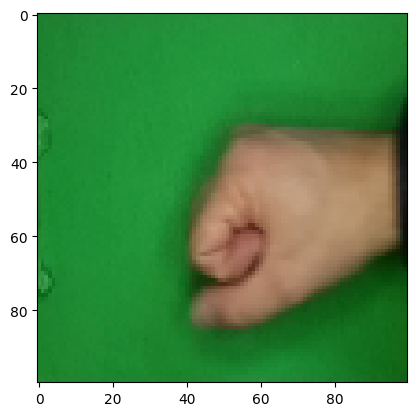

In [197]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,100))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=20)
  print(classes)
  print(fn)
  if classes[0,0] == 1.0:
    print('Paper')
  elif classes[0,1] == 1.0:
    print('Rock')
  else:
    print('Scissors')